In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

First you need to build the graph in networkX.  Barabasi-Albert graphs are supposed to be similar to human networks.

In [8]:
pop_size = 50000
pop = nx.barabasi_albert_graph(pop_size, 15, seed = 5)

We need to choose an initial infected person.  You can start with more infected people, but need to make edits below.

In [9]:
first = np.random.randint(pop_size-pop_size//5)+pop_size//5

This is where you set up initial parameters for the transmition.

In [10]:

N_max = 15   #The hard cap of the number of people a person can interact with in a day 
             #this can be edited during run to simulate social distancing
p=.2         #The percentage of persons contacts they interact with
             #this can be edited during run to simulate social distancing
cont_days = 9    # number of days a person is contagious for
cure_days = 20   # number of days from contraction to being cured
mortality_rate = 0.03   #mortality rate
death_prob = np.exp(np.log(1-mortality_rate)/(cure_days-cont_days))  # This is used to simulate death
p_trans = .125/4    # probability an interaction results in an infection
N = 150       # number of iterations to run simulation for

cont = np.zeros((N,))     # where number of contagious people are stored
infect = np.zeros((N,))  # where number of infected people are stored
cured = np.zeros((N,))   # where number of cured people are stored
dead = np.zeros((N,))  # where number of dead people are stored

In [12]:
####
# Setting attributes

nx.set_node_attributes(pop, 0,'condition')
nx.set_node_attributes(pop, 0,'contagious')
nx.set_node_attributes(pop, 0,'dead')

######
# Setting initial patients.  You can repeat this for multiple nodes if you want multiple seed patients

pop.node[first]['condition'] = 1
pop.node[first]['contagious'] = 1


np.random.seed(seed=10)


for i in range(N):
    l = [x for x,y in pop.nodes(data=True) if y['contagious']==1]
    L = [x for x,y in pop.nodes(data=True) if ((y['condition']>cont_days)&(y['condition']<cure_days-1))]
    infect[i] = len([x for x,y in pop.nodes(data=True) if y['condition']>0])
    cont[i] = len(l)
    cured[i] = len([x for x,y in pop.nodes(data=True) if y['condition']>cure_days-2])
    dead[i] = len([x for x,y in pop.nodes(data=True) if y['dead']==1])
    #######
    # here you can institute social policies 
    if infect[i]>pop_size//100:
        N_max = N_max
    else:
        pass

    ######
    # This is where interactions cause new patients
    for a in l:
        temp = np.minimum(np.random.randint(low=0,high = int(len(list(pop.neighbors(a)))*2*p)+1),N_max)
        l2 = np.random.choice(list(pop.neighbors(a)),temp, replace=False)
        for i in l2:
            if pop.node[i]['condition'] == 0:
                if np.random.uniform()<p_trans:
                    pop.node[i]['condition'] = 1
                    pop.node[i]['contagious'] = 1
                else:
                    pass
            else:
                pass
    ######
    # This is where people stop being contagious
    for a in l:
        if pop.node[a]['condition'] < cont_days:
            pop.node[a]['condition'] += 1
        else:
            pop.node[a]['contagious'] = 0
            pop.node[a]['condition'] += 1
    ######
    # This is where people die 
    for a in L:
        temp = np.random.uniform()
        if temp>death_prob:
            pop.node[a]['contagious'] = 0
            pop.node[a]['dead'] = 1
        else:
            pop.node[a]['condition'] += 1


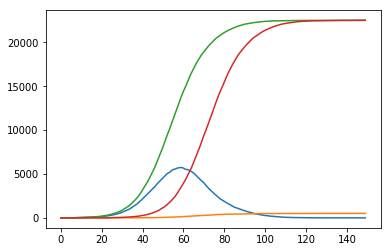

In [17]:
plt.plot(cont)
plt.plot(dead)
plt.plot(infect)
plt.plot(cured)